In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bokeh.plotting import figure, output_file, show

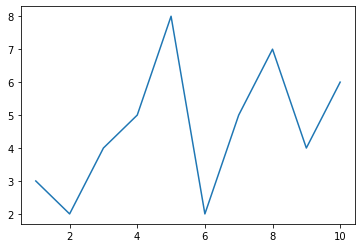

In [2]:
# Simple stuff
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6])

Text(0.5, 1.0, 'Sample Chart')

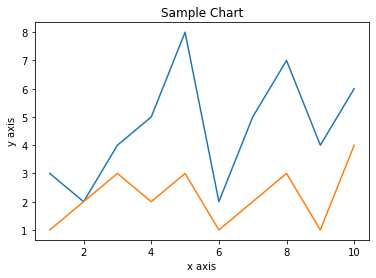

In [5]:
#  Declare a chart with one Axis
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6], label = 'data1')
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 2, 3, 1, 2, 3, 1, 4], label = 'data2') 
ax.set_xlabel('x axis') 
ax.set_ylabel('y axis')
ax.set_title("Sample Chart")

In [6]:
netflix = pd.read_csv("C:/Users/savil/Downloads/netflix_titles.csv/netflix_titles.csv")

In [7]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
n_df = netflix.groupby(['release_year', 'type'], as_index = False).show_id.count()
n_df.columns = ['release_year', 'type', 'count']
n_df_pivot = n_df.pivot(index = 'release_year', columns = 'type', values = 'count').reset_index()
n_df_pivot.fillna(0, inplace = True)
n_df_pivot.head()

type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,0.0


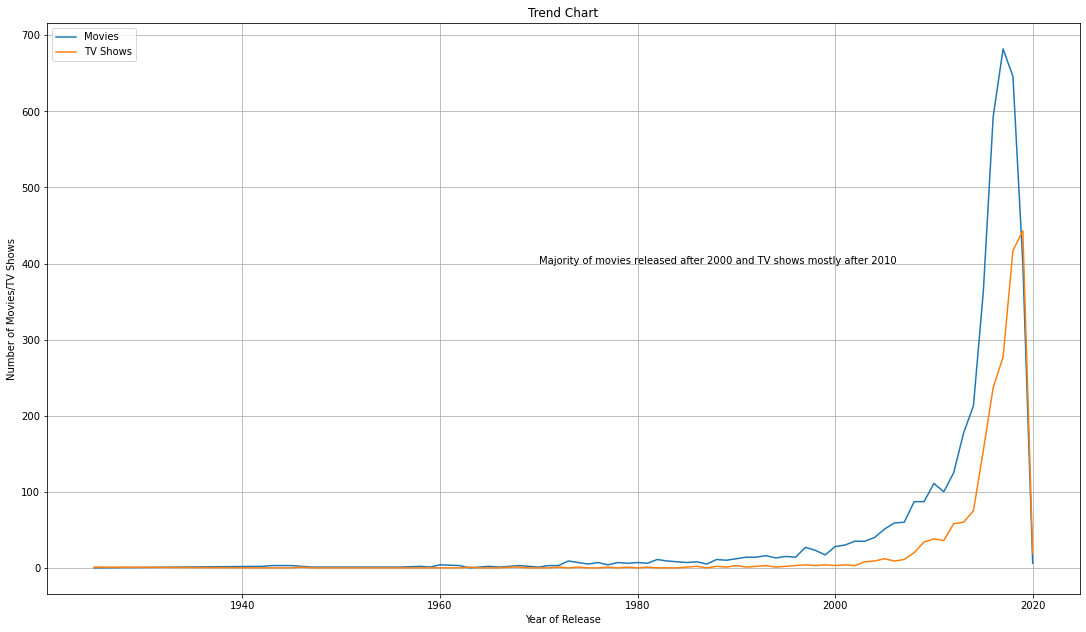

In [10]:
fig, ax = plt.subplots()
ax.plot(n_df_pivot.release_year, n_df_pivot.Movie, label = 'Movies')
ax.plot(n_df_pivot.release_year, n_df_pivot['TV Show'], label = 'TV Shows')
ax.set_ylabel("Number of Movies/TV Shows")
ax.set_xlabel("Year of Release")
ax.set_title("Trend Chart")
plt.text(x = 1970, y = 400, s = r'Majority of movies released after 2000 and TV shows mostly after 2010')
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend()

In [12]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
netflix_data = pd.read_csv("C:/Users/savil/Downloads/netflix_titles.csv/netflix_titles.csv")
netflix_data['year_added'] = netflix_data['date_added'].str.slice(start = -4)
n_df_added = netflix_data.groupby(['year_added', 'type'], as_index = False).show_id.count()
n_df_added.columns = ['year_added', 'type', 'count']
n_df_added = n_df_added.pivot(index = 'year_added', columns = 'type', values = 'count').reset_index()
n_df_added.fillna(0, inplace = True)
n_df_added.head()

type,year_added,Movie,TV Show
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,4.0,3.0


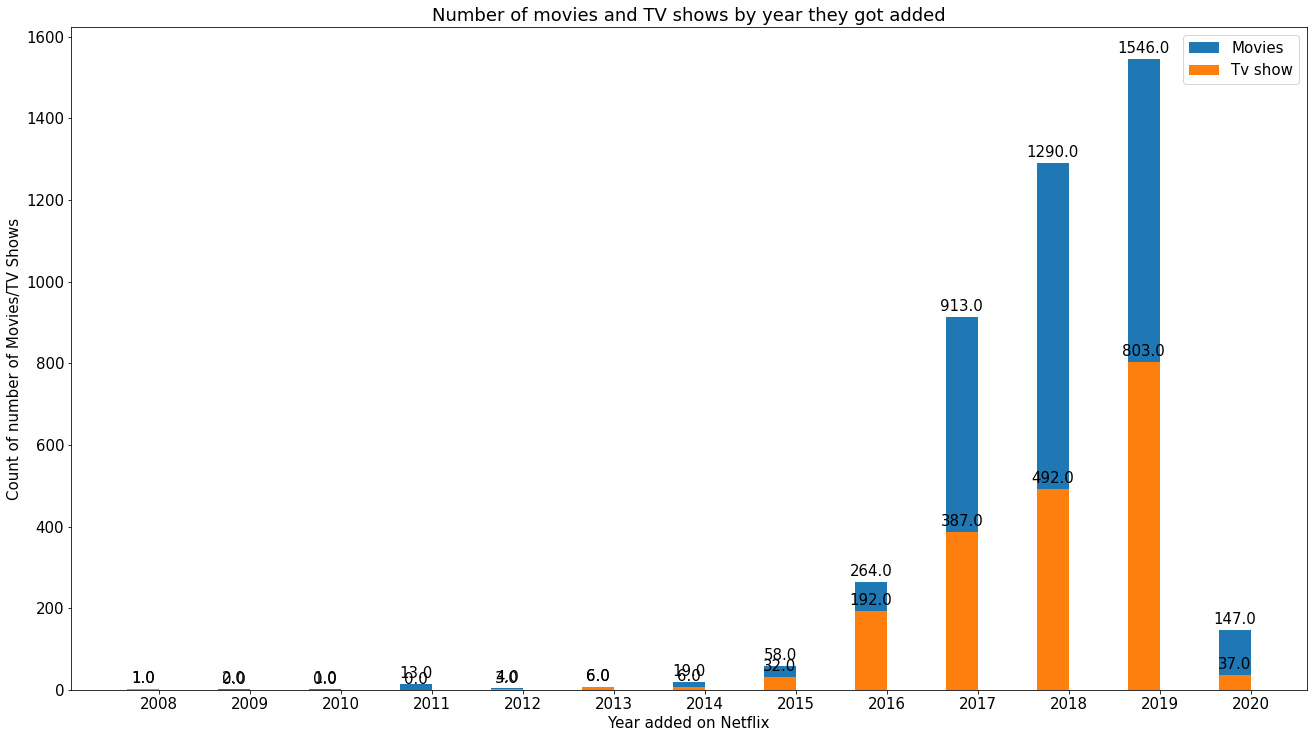

In [22]:
labels = n_df_added['year_added']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
Movie_rects = ax.bar(x - width/2, n_df_added['Movie'], width, label = 'Movies')
Tv_rects = ax.bar(x - width/2, n_df_added['TV Show'], width, label = 'Tv show')

ax.set_xlabel("Year added on Netflix")
ax.set_ylabel("Count of number of Movies/TV Shows")
ax.set_title("Number of movies and TV shows by year they got added")
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 15})
ax.legend()

def gen_label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords = 'offset points',
                   ha = 'center', va = 'bottom')

gen_label(Movie_rects)
gen_label(Tv_rects)

fig.tight_layout()
plt.show()

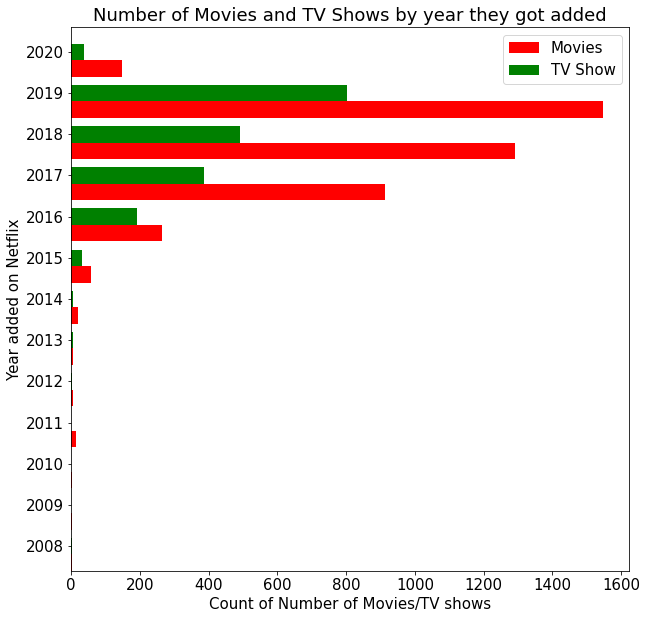

In [29]:
data = pd.DataFrame(dict(Year = n_df_added['year_added'],
                        Movie = n_df_added['Movie'], TVshow = n_df_added['TV Show']))

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color = 'red', label = 'Movies')
ax1.barh(ind + width, data.TVshow, width, color = 'green', label = 'TV Show')

ax1.set(yticks = ind + width, yticklabels = data.Year, ylim= [2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflix')
ax1.set_xlabel('Count of Number of Movies/TV shows')
ax1.set_title('Number of Movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()

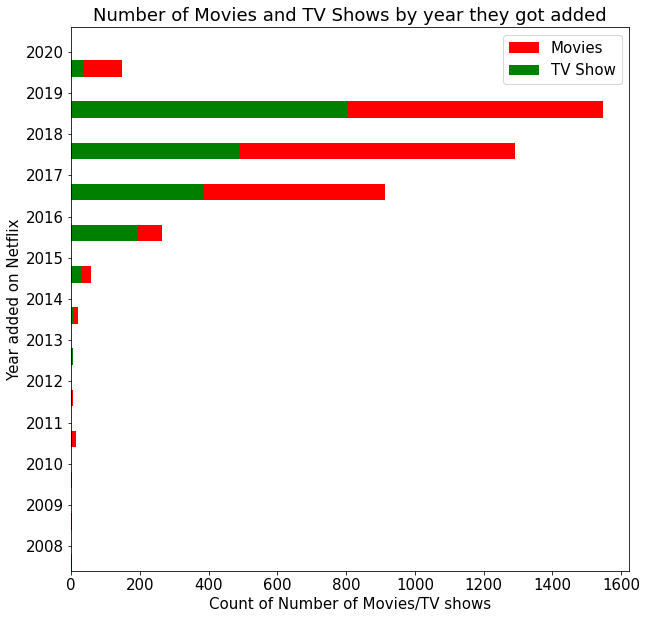

In [30]:
data = pd.DataFrame(dict(Year = n_df_added['year_added'],
                        Movie = n_df_added['Movie'], TVshow = n_df_added['TV Show']))

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color = 'red', label = 'Movies')
ax1.barh(ind, data.TVshow, width, color = 'green', label = 'TV Show')

ax1.set(yticks = ind + width, yticklabels = data.Year, ylim= [2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflix')
ax1.set_xlabel('Count of Number of Movies/TV shows')
ax1.set_title('Number of Movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()

In [33]:
# Making pie chart
n_df_added['Total'] = n_df_added['Movie'] + n_df_added['TV Show']
n_df_added_flt = n_df_added[-4:]
n_df_added_flt = n_df_added_flt.reset_index(drop = True)
n_df_added_flt.head()

type,year_added,Movie,TV Show,Total
0,2017,913.0,387.0,1300.0
1,2018,1290.0,492.0,1782.0
2,2019,1546.0,803.0,2349.0
3,2020,147.0,37.0,184.0


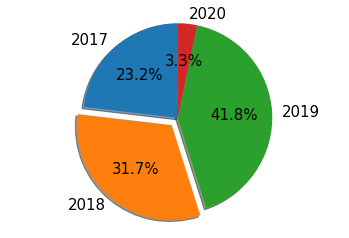

In [34]:
labels = n_df_added_flt['year_added']
sizes = n_df_added_flt['Total']
explode = (0, 0.1, 0, 0)

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax2.axis('equal')
plt.show()

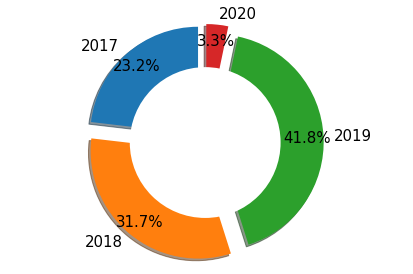

In [35]:
labels = n_df_added_flt['year_added']
sizes = n_df_added_flt['Total']
explode = (0.1, 0.1, 0.1, 0.1)

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85)

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

ax2.axis('equal')
plt.tight_layout()
plt.show()

In [38]:
df = pd.read_csv("Documents/heart_fail.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [39]:
agg_data = df.groupby(['age', 'DEATH_EVENT'], as_index = False).ejection_fraction.count()
agg_data.columns = ['Age', 'Death_Event', 'Count']
agg_data.head()

,Age,Death_Event,Count
0,40.0,0,7
1,41.0,0,1
2,42.0,0,6
3,42.0,1,1
4,43.0,0,1


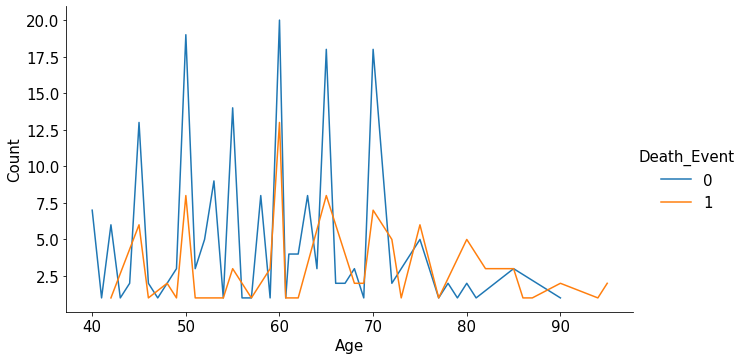

In [42]:
sns.relplot(x = 'Age', y = 'Count', hue = 'Death_Event', aspect = 16/9, kind = 'line', data = agg_data)

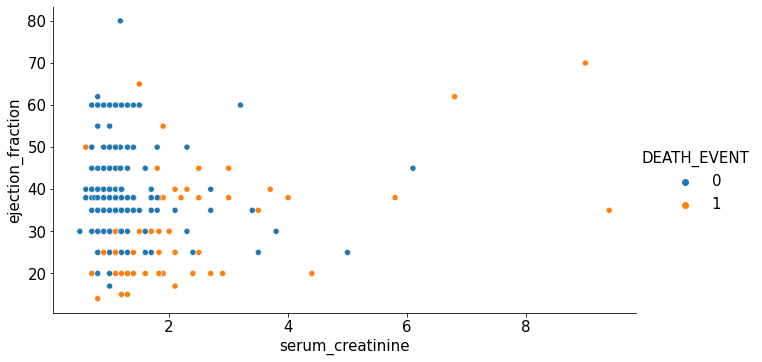

In [43]:
sns.relplot(x = 'serum_creatinine', y = 'ejection_fraction', hue = 'DEATH_EVENT', kind = 'scatter', 
           data = df, aspect = 16/9)

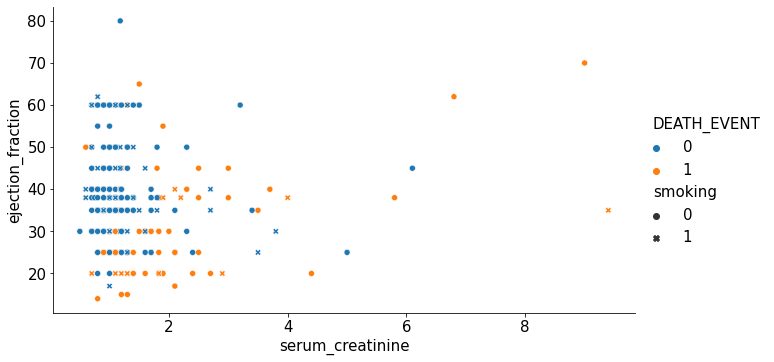

In [45]:
sns.relplot(x = 'serum_creatinine', y = 'ejection_fraction', hue = 'DEATH_EVENT', kind = 'scatter', 
           data = df, style = 'smoking', aspect = 16/9)

In [47]:
agg_data2 = df.groupby(['age', 'ejection_fraction'], as_index = False).DEATH_EVENT.sum()
agg_data2.columns = ['Age', 'ejection_fraction', 'Deaths']
agg_data2_p = agg_data2.pivot(index = 'Age', columns = 'ejection_fraction', values = 'Deaths')
agg_data2_p.fillna(0, inplace = True)
agg_data2_p.head()

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
Age,,,,,,,,,,,,,,,,,
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


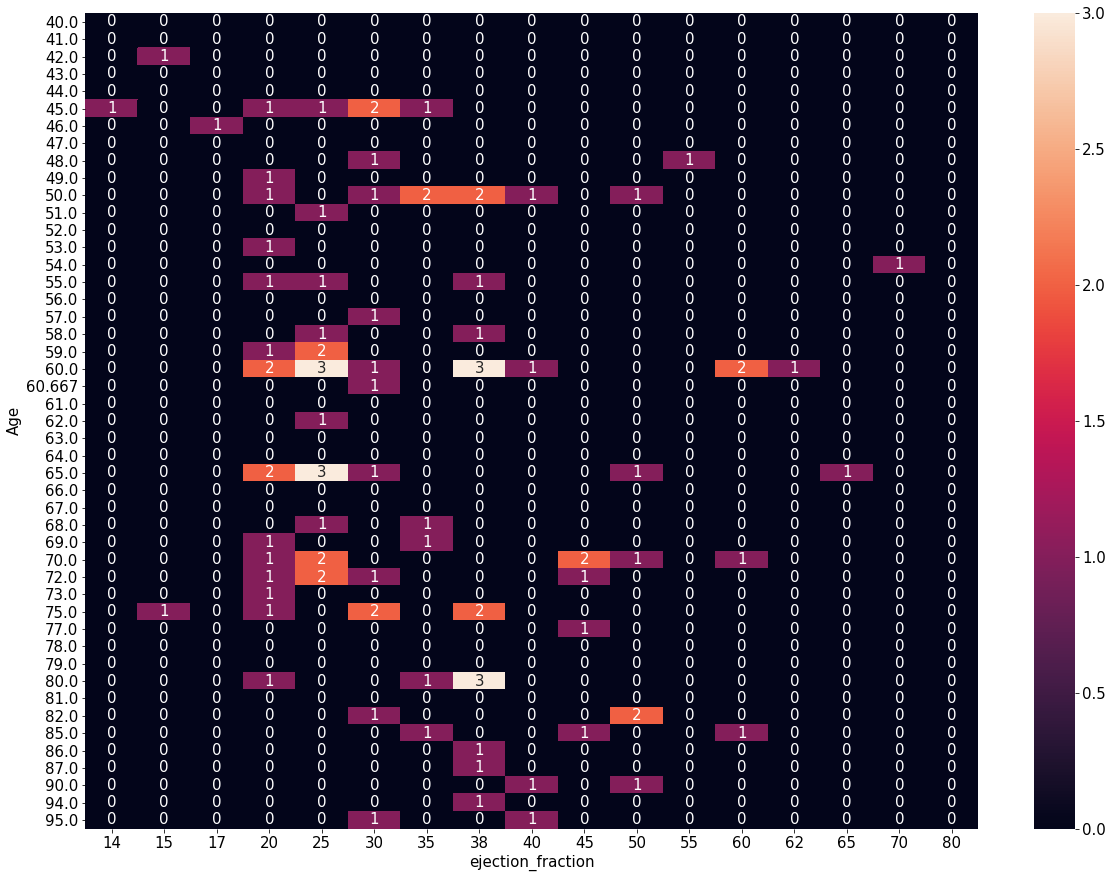

In [48]:
plt.subplots(figsize = (20,15))
sns.heatmap(agg_data2_p, annot = True)
plt.show()

In [49]:
subset = df.iloc[:,[0,1,2,3,4]]
subset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction
0,75.0,0,582,0,20
1,55.0,0,7861,0,38
2,65.0,0,146,0,20
3,50.0,1,111,0,20
4,65.0,1,160,1,20


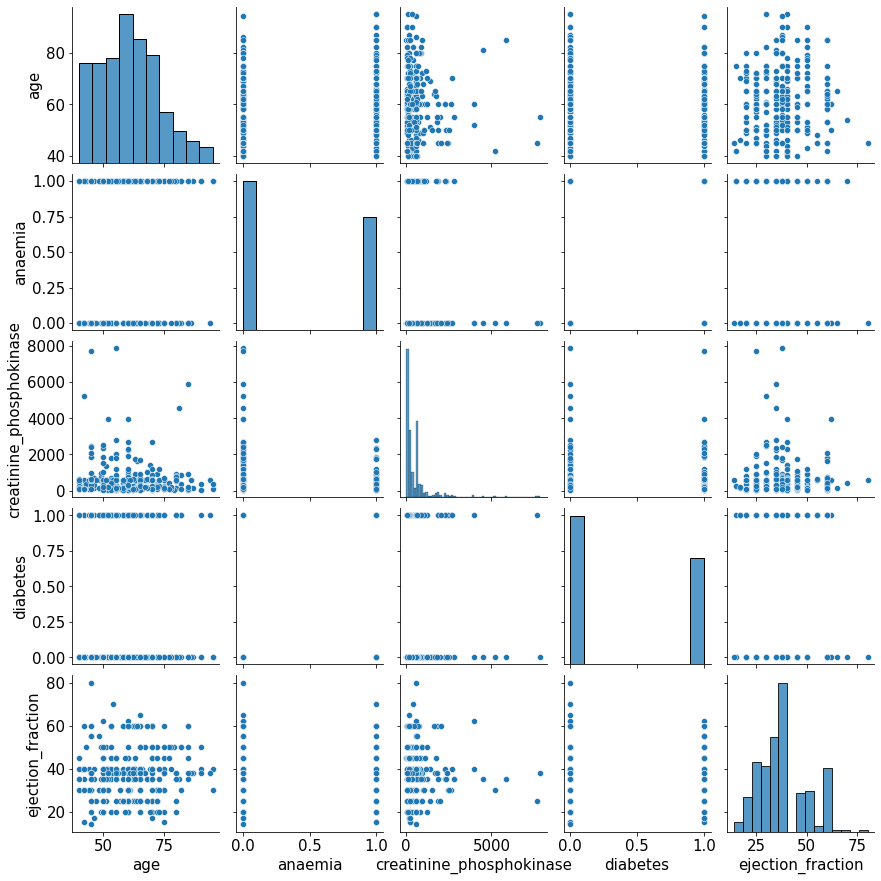

In [50]:
sns.pairplot(subset)

In [ ]:
# Interactive Plot

In [53]:
p = figure(title = 'Age vs Ejection Fraction')
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'Ejection Fraction'

p.circle(agg_data2['Age'], agg_data2['ejection_fraction'], fill_alpha = 0.2, size = 10)

output_file('test.html', title = "Example")

show(p)
# This takes you to a seperate html screen for interactive plot